In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

matplotlib: 3.3.4
pandas: 1.2.4
sklearn: 0.24.1
seaborn: 0.11.1


In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv("creditcardcsvpresent.csv")

In [4]:
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [10]:
df.Merchant_id.count()

3075

In [9]:
df.Merchant_id.nunique()

3015

In [6]:
null_transaction = df[df.Transaction_amount == 0]

In [8]:
null_transaction.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,9.100000e+01,0.0,91.000000,91.0,91.000000,91.000000,91.000000,91.000000
mean,4.879309e+09,NaN,512.254690,0.0,0.450549,38.373626,23.307692,0.186813
std,1.000809e+09,NaN,291.305624,0.0,1.249566,180.614300,118.143199,0.987838
min,3.377599e+09,NaN,19.999198,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.964404e+09,NaN,295.011917,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.888177e+09,NaN,442.745154,0.0,0.000000,0.000000,0.000000,0.000000
75%,5.484732e+09,NaN,791.099598,0.0,0.000000,0.000000,0.000000,0.000000
max,6.661274e+09,NaN,994.171111,0.0,6.000000,942.000000,843.000000,7.000000


## Let's explore the data

In [7]:
df.shape

(3075, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [9]:
df.sample(10)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
2654,6149726996,NaN,96.109891,2594.967048,N,0,N,N,0,0.0,0,N
509,3399674481,NaN,536.617484,2683.087422,N,0,Y,N,0,0.0,0,N
2669,6167533542,NaN,358.479644,9320.470747,N,0,N,N,0,0.0,0,N
1364,4481573683,NaN,356.847395,8921.184863,N,0,N,N,0,0.0,0,N
977,3998860637,NaN,326.531073,9142.870052,N,0,N,N,0,0.0,0,N
774,3757168855,NaN,391.406702,391.406702,N,0,N,N,0,0.0,0,N
1656,4886245584,NaN,297.216766,6241.552082,N,0,Y,N,0,0.0,0,N
642,3568848026,NaN,861.720085,1723.440169,N,0,N,N,0,0.0,0,N
2354,5783625437,NaN,589.574767,5895.747668,N,0,N,N,0,0.0,0,N
1852,5139776398,NaN,895.276484,25067.741540,N,0,N,N,0,0.0,0,N


In [10]:
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


### Studying the target variable

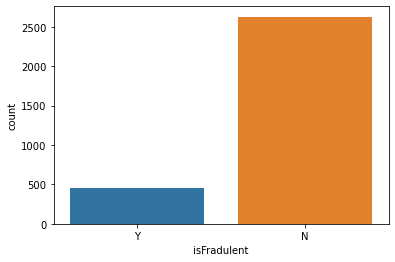

In [11]:
sns.countplot(x='isFradulent', data=df);

In [12]:
df.isFradulent.value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

#### Only 17% of transactions are fraudulent, the dataset is unbalanced !

In [13]:
448/2627

0.1705367339170156

<AxesSubplot:ylabel='Frequency'>

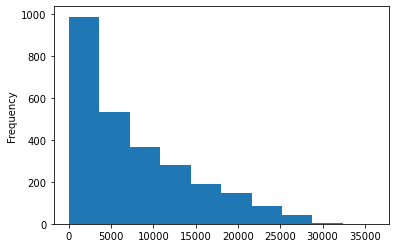

In [14]:
df[df['isFradulent'] == 'N'].Transaction_amount.plot.hist()

<AxesSubplot:ylabel='Frequency'>

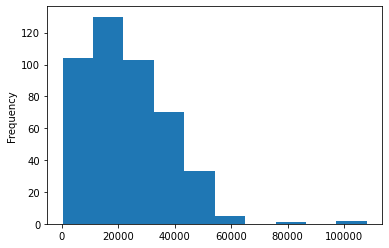

In [15]:
df[df['isFradulent'] == "Y"].Transaction_amount.plot.hist()

### Checking if there are missing values

In [16]:
pd.isnull(df).sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

#### Studying the correlations between the target variable and the features
#### The target variable is categorical the features are either numerical or categorical

#### Lets check the correlation between categorical variables and the target variable

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

#### Let's rename the columns

In [17]:
for col in df.select_dtypes("object"):
    print(col)

Is declined
isForeignTransaction
isHighRiskCountry
isFradulent


In [18]:
df.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [23]:
df = df.rename(columns={'Is declined':'is_declined','isForeignTransaction':'is_foreign_transaction','isHighRiskCountry':'is_high_risk_country','isFradulent':'is_fraudulent','Total Number of declines/day':'total_number_of_declines_per_day','Transaction date':'transaction_date','Average Amount/transaction/day':'average_amount_transaction_day','Daily_chargeback_avg_amt':'daily_chargeback_avg_amt'})

In [27]:
df.describe()

,Merchant_id,transaction_date,average_amount_transaction_day,Transaction_amount,total_number_of_declines_per_day,daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [ ]:
data_crosstab = pd.crosstab(df['Is'],
                            df['isFradulent'], 
                               margins = False)

In [ ]:
## Keeping the features that are most correlated with the target 

### Feature encoding 

In [7]:
df['Is declined']=df['Is declined'].replace('N',0)
df['Is declined']=df['Is declined'].replace('Y',1)

In [8]:
df['isForeignTransaction']=df['isForeignTransaction'].replace('N',0)
df['isForeignTransaction']=df['isForeignTransaction'].replace('Y',1)

In [9]:
df['isHighRiskCountry']=df['isHighRiskCountry'].replace('N',0)
df['isHighRiskCountry']=df['isHighRiskCountry'].replace('Y',1)

In [10]:
df['isFradulent']=df['isFradulent'].replace('N',0)
df['isFradulent']=df['isFradulent'].replace('Y',1)

In [11]:
df = df.drop(columns=["Merchant_id","Transaction date"])

In [11]:
#df.corr()

In [12]:
#sns.heatmap(df.corr(),annot=True)

In [22]:
# Distribution of normal transactions amount

In [24]:
df.to_csv("df_clean.csv",sep=',')